_Project instructions:_
# Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at the end of your submission, or in a separate file. We also accept incomplete solutions.
## Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

_Project submission (Leo Evancie):_

First, I'll import libraries, load the .json file, inspect the top 5 rows and read the DataFrame info:

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

logins = pd.read_json('logins.json')

logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [2]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Pandas reports no null values, however I see logins appearing to have occurred on Jan 1 1970. This date often corresponds to date-values of zero. What other years can be found in the data?

In [3]:
logins.groupby(logins.login_time.dt.year).count()

,login_time
login_time,
1970,93142


Hmm! All of the records are coded as 1970. This is obviously impossible for a smartphone app, and should be investigated at the source.

If there were no further issues with our DateTime column, we could continue with the analysis and understand that the data must come from some year more recent than 1970. But are there other issues?

Let's back up and simply try to resample the data in 15min increments, as instructed, to get a high-level sense of the scope and pattern of the data.

In [4]:
logins_15min = logins.resample('15min', on='login_time').count()
logins_15min

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


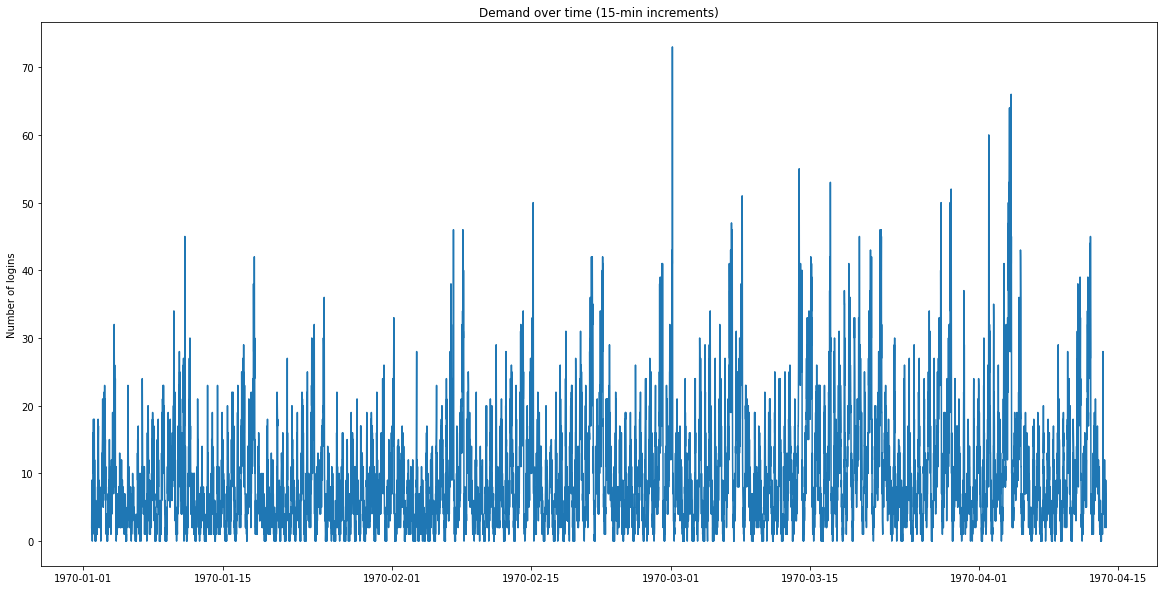

In [5]:
plt.figure(figsize=(20,10))
plt.plot(logins_15min)
plt.title('Demand over time (15-min increments)')
plt.ylabel('Number of logins')
plt.show()

We can't learn much from this dense line graph except that there are no obvious gaps in our data. That is, there appear to data from the putative start time (Jan 1) to the putative end time (Apr 13). Still, this is a good sign that the only data-quality issue we have here is the miscoding of the year.

The next step is to re-visualize this data at a more legible scale, where we can inspect daily demand cycles and other important characteristics.

Here is an example of one day from the 15-minute increment data:

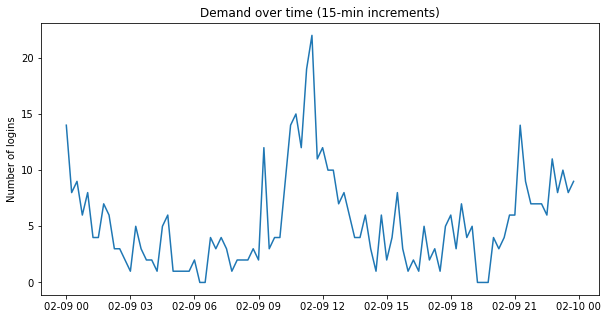

In [6]:
plt.figure(figsize=(10,5))
plt.plot(logins_15min.loc['1970-02-09'])
plt.title('Demand over time (15-min increments)')
plt.ylabel('Number of logins')
plt.show()

We notice a spike in activity around midday, with lesser spikes at the very start and end of the day. This is to be expected for a rideshare app, particularly during a weekday; people call a cab to grab lunch from the office, and perhaps for a late evening out. But we can't yet be sure whether this is actually a weekday, given the erroneous year. What if we visualize 7 days in a row?

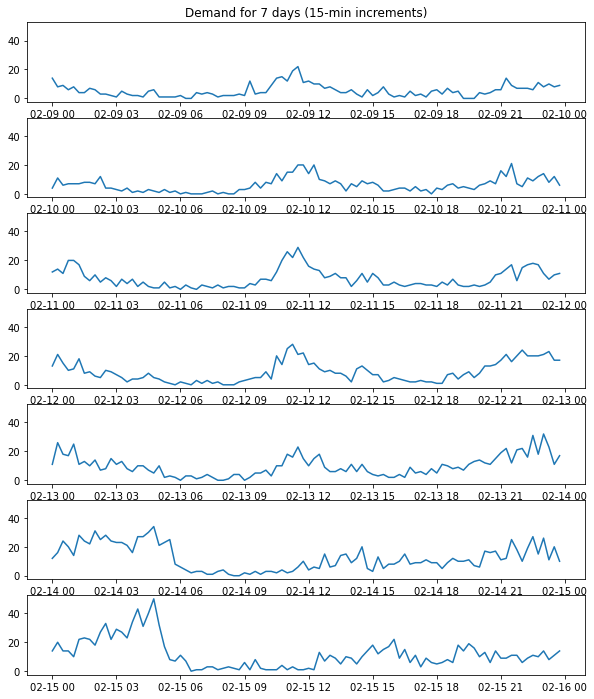

In [7]:
fig, axs = plt.subplots(7, 1, sharey=True, figsize=(10,12))
axs[0].plot(logins_15min.loc['1970-02-09'])
axs[0].set_title('Demand for 7 days (15-min increments)')
axs[1].plot(logins_15min.loc['1970-02-10'])
axs[2].plot(logins_15min.loc['1970-02-11'])
axs[3].plot(logins_15min.loc['1970-02-12'])
axs[4].plot(logins_15min.loc['1970-02-13'])
axs[5].plot(logins_15min.loc['1970-02-14'])
axs[6].plot(logins_15min.loc['1970-02-15'])
plt.show()

Here's the __daily demand profile for a given week__. The first five days share similar patterns; high points at the start, middle, and end of the day. The last two days share a different pattern; high activity from midnight into the wee hours, and lesser activity throughout the day. I think it's safe to say we've identified a Monday through Sunday streak here.

Google shows us that the only recent year when February 9th was a Monday was 2015. This year is much more plausible for a taxi app, and is likely the correct year for these data.

Now, is there any daily or monthly periodicity to the rental data? Let's look at a sample of two weeks, with logins counted daily, starting on a Monday:

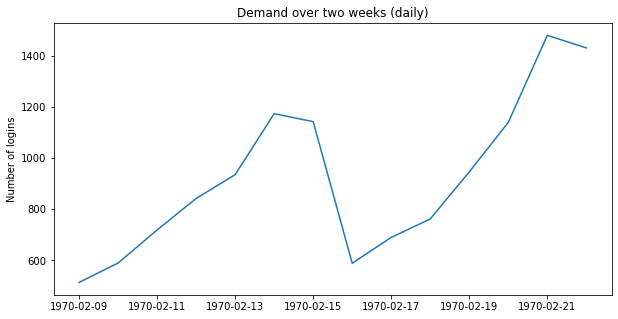

In [8]:
logins_daily = logins.resample('D', on='login_time').count()

plt.figure(figsize=(10,5))
plt.plot(logins_daily.loc['1970-02-09':'1970-02-22'])
plt.title('Demand over two weeks (daily)')
plt.ylabel('Number of logins')
plt.show()

And again, this time showing the entire dataset:

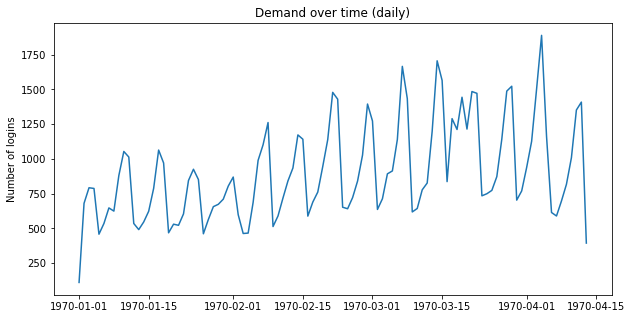

In [9]:
plt.figure(figsize=(10,5))
plt.plot(logins_daily)
plt.title('Demand over time (daily)')
plt.ylabel('Number of logins')
plt.show()

From a low point on Monday, demand rises throughout the week, peaking at the weekend. This pattern appears to hold throughout the dataset with the exception of mid-March.

Finally, we can glimpse larger-scale trends by plotting the weekly totals:

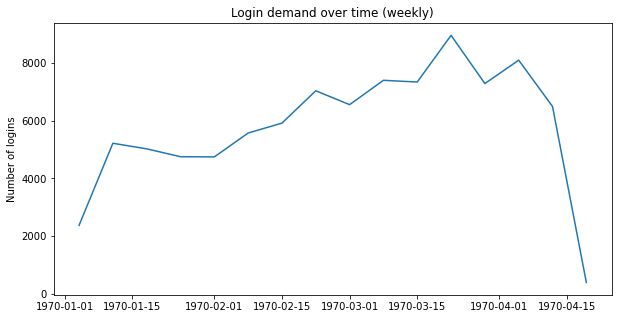

In [10]:
logins_weekly = logins.resample('W', on='login_time').count()

plt.figure(figsize=(10,5))
plt.plot(logins_weekly)
plt.title('Login demand over time (weekly)')
plt.ylabel('Number of logins')
plt.show()

Understanding that the first and last points reflect partial weeks' data, we see an overall steady increase in demand from January to April. I would be curious to add daily high temperatures to this plot; do people simply take cabs more often when it's warmer?